In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
df=pd.read_csv('pima.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [5]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [6]:
print(accuracy_score(ytest,ypred))

0.7402597402597403


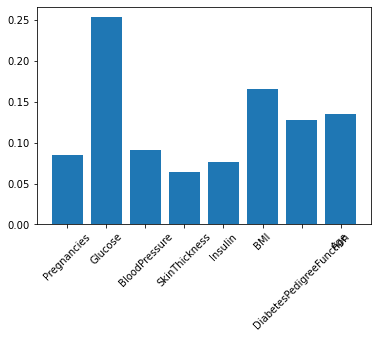

In [7]:
plt.bar(x.columns,model.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In [9]:
# plt.figure(figsize=(80,40))
# plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);
# plt.show()

In [10]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [11]:
accuracy_score(ytest,ypred)

0.7077922077922078

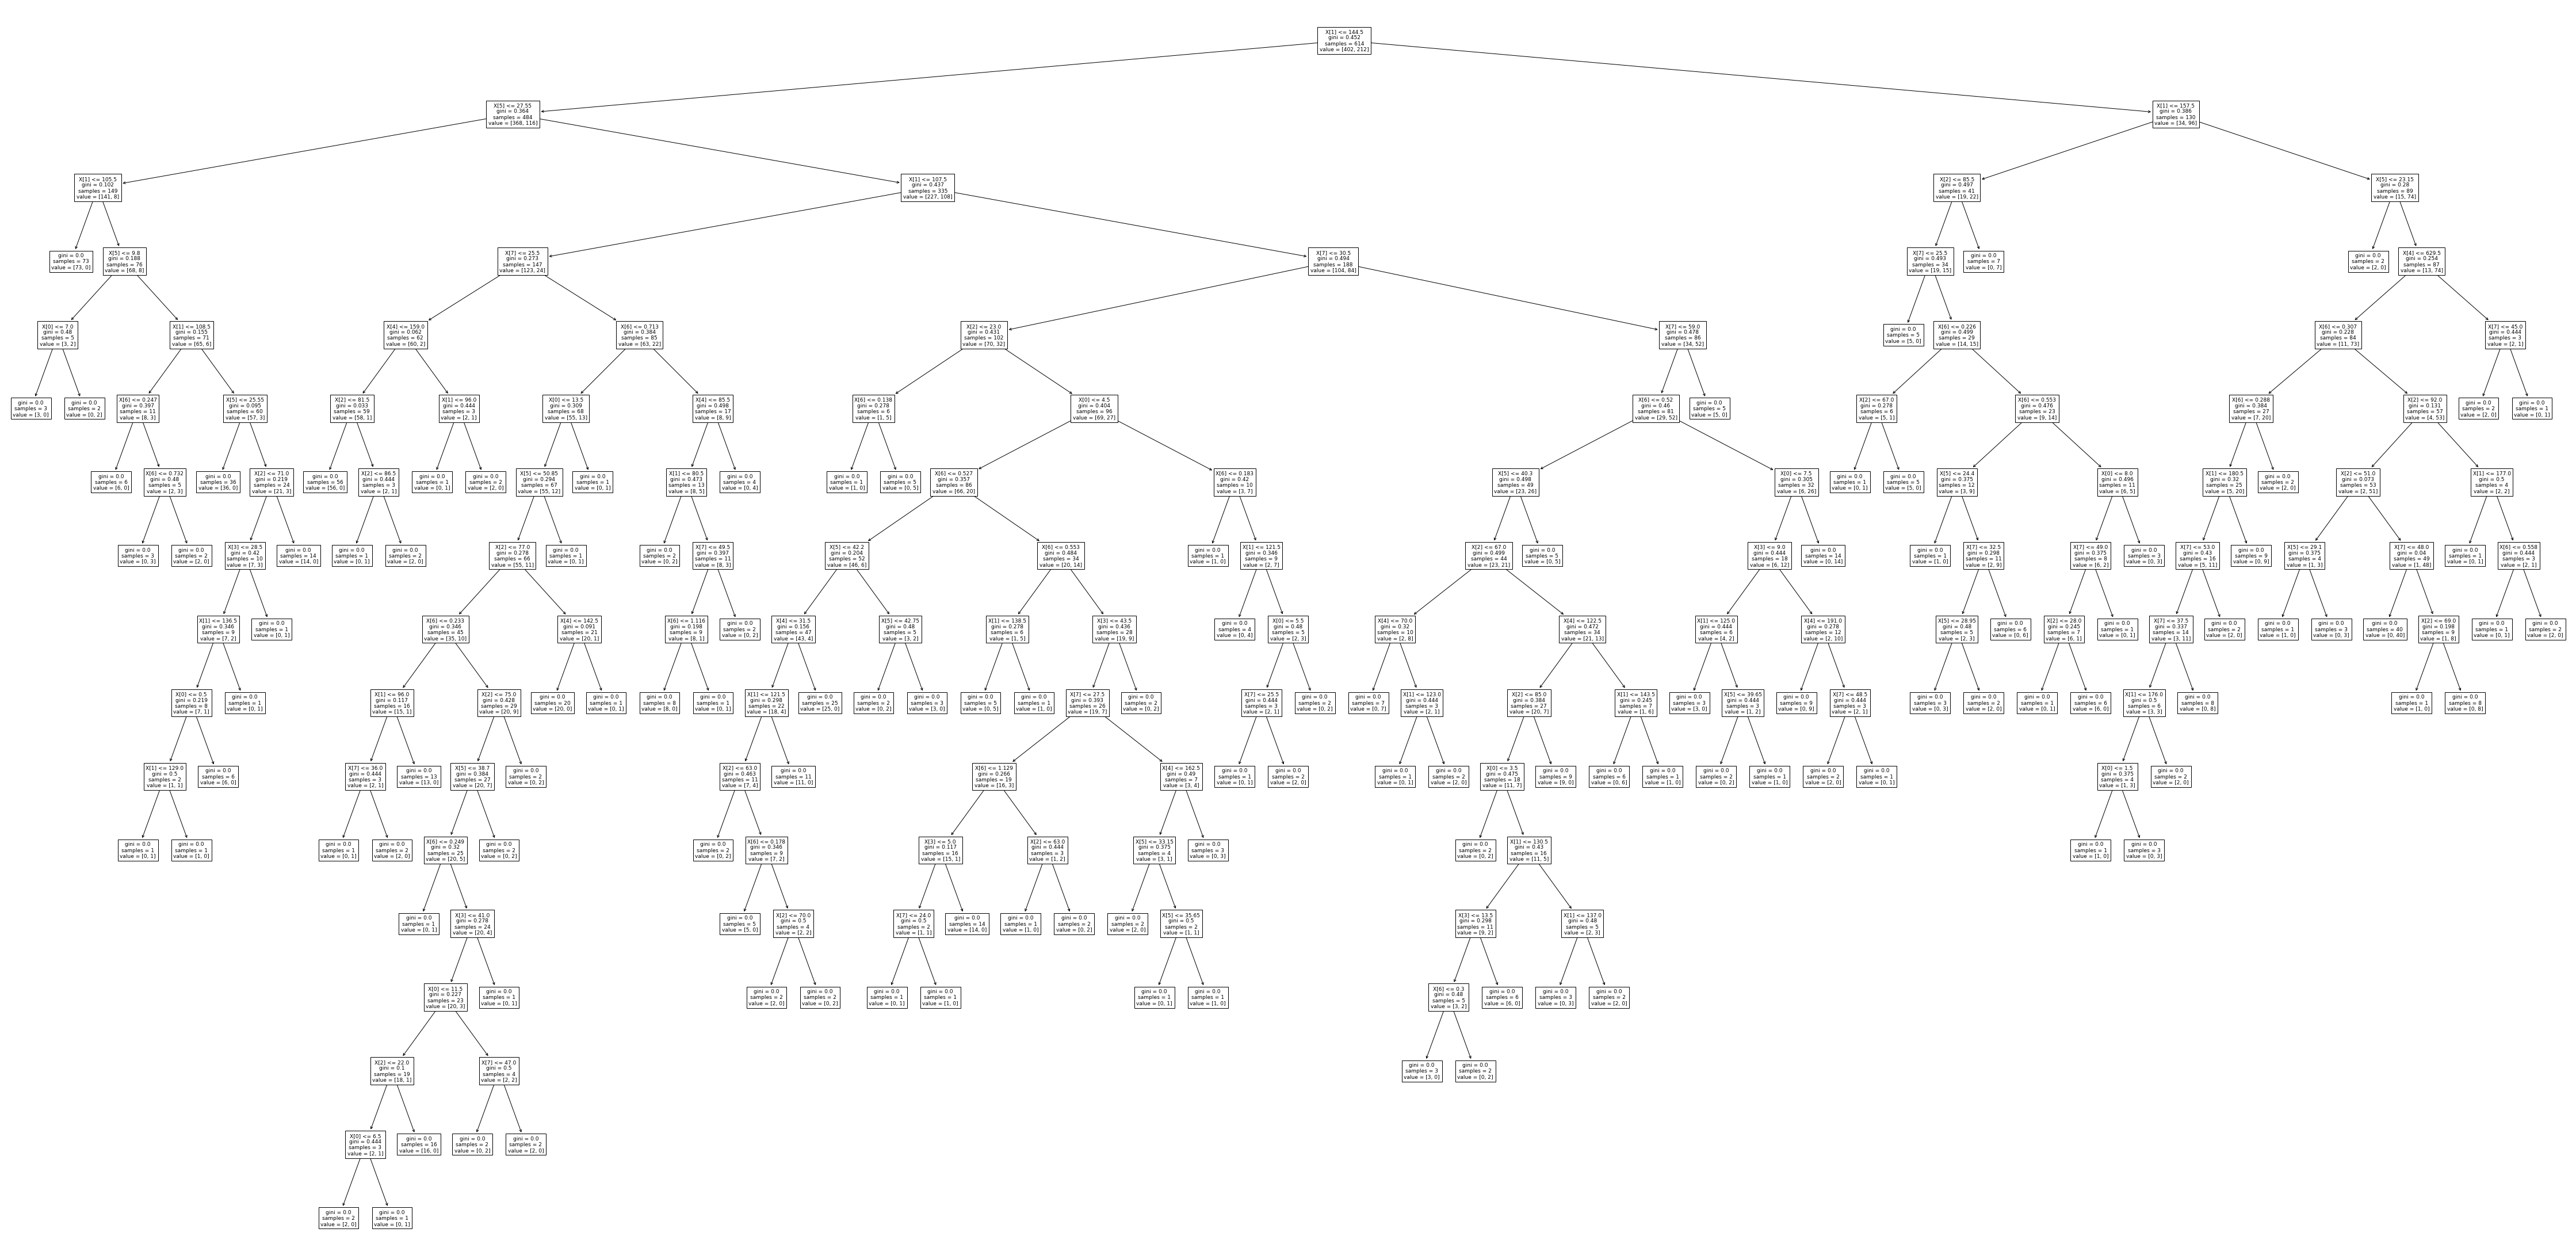

In [19]:
plt.figure(figsize=(80,40))
plot_tree(model)
plt.show()